In [1]:
import pandas
import seaborn
import numpy as np

data = pandas.read_csv("Olympiads_2022_colors.csv")

In [2]:
data

,Rank in Europe,Mathematics,Physics,Informatics,Chemistry,Mathematics.1,Mathematics.2,Mathematics.3,Informatics.1,Unnamed: 9,PISA 2018 Math
0,1,Romania,Romania,Ukraine,Turkey,Romania,Romania,Romania,Romania,NaN,Estonia
1,2,Germany,Germany,Croatia,Romania,Bulgaria,Greece,Serbia,Poland,NaN,Netherlands
2,3,Italy,Georgia,Romania,United Kingdom,Turkey,Bulgaria,Turkey,Croatia,NaN,Poland
3,4,Poland,Bulgaria,Slovenia,Poland,Ukraine,Italy,France,Hungary,NaN,Switzerland
4,5,United Kingdom,Hungary,Poland,Bulgaria,Hungary,Moldova,Greece,Slovakia,NaN,Denmark
5,6,Bulgaria,France,Bulgaria,Hungary,Germany,North Macedonia,Bulgaria,Germany,NaN,Slovenia
6,7,Ukraine,Slovenia,Turkey,Germany,Poland,Serbia,North Macedonia,Ukraine,NaN,Belgium
7,8,Armenia,Turkey,Serbia,Ukraine,Italy,Azerbaijan,Azerbaijan,Slovenia,NaN,Finland
8,9,Greece,United Kingdom,France,Azerbaijan,United Kingdom,United Kingdom,Bosnia & Herzegovina,Switzerland,NaN,Sweden
9,10,Turkey,Poland,Netherlands,Austria,Bosnia & Herzegovina,Bosnia & Herzegovina,Moldova,Italy,NaN,United Kingdom


In [3]:
# list of competitions we look at
competitions = [i for i in data if i != "Unnamed: 9" and i != "Rank in Europe"]
competitions

['Mathematics',
 'Physics',
 'Informatics',
 'Chemistry',
 'Mathematics.1',
 'Mathematics.2',
 'Mathematics.3',
 'Informatics.1',
 'PISA 2018 Math']

In [4]:
# returns the percentage of the number of pairs of countries that appear in both
# contests and formed an inversion (one did better in a constest, the other did better
# in the other contest)
def corelation(contest_a, contest_b):
    ranking_b = { country : rank for rank, country in enumerate(contest_b) }
    assert len(ranking_b) == len(contest_b)
    pairs, inversions = 0, 0

    for i in range(len(contest_a)):
        country_1 = contest_a[i]
        if country_1 not in ranking_b:
            continue
        for country_2 in contest_a[i + 1:]:
            if country_2 not in ranking_b:
                continue
            # got a pair
            pairs += 1
            if ranking_b[country_1] > ranking_b[country_2]:
                # got an inversion
                inversions += 1
    return 100. - inversions / pairs * 100.

In [5]:
# returns the rankings for a given competition
def get_rankings(competition):
    return [i for i in data[competition] if not pandas.isna(i)]

print(f"{competitions[0]}:\n{get_rankings(competitions[0])[:10]}")

Mathematics:
['Romania', 'Germany', 'Italy', 'Poland', 'United Kingdom', 'Bulgaria', 'Ukraine', 'Armenia', 'Greece', 'Turkey']


<AxesSubplot:>

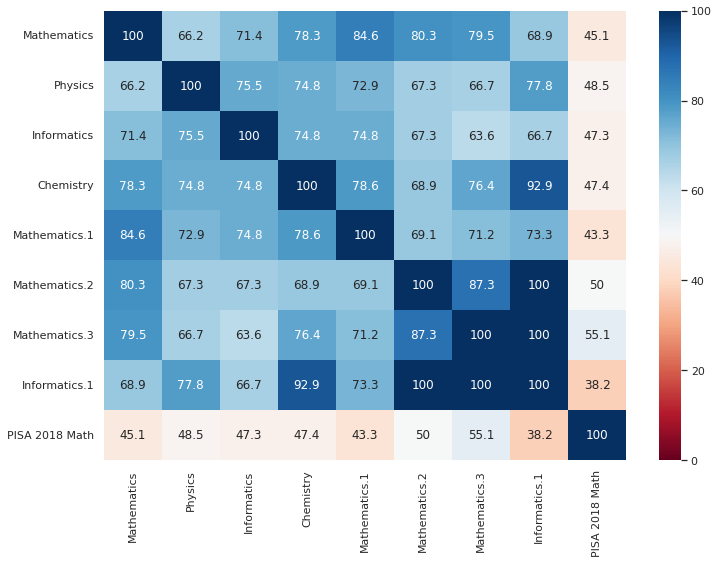

In [6]:
heatmap = np.array([
    [ corelation(get_rankings(contest_a), get_rankings(contest_b)) for contest_b in competitions ]
    for contest_a in competitions
])

seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.heatmap(heatmap, xticklabels=competitions, yticklabels=competitions, annot=True, cmap='RdBu', vmin=0, vmax=100, fmt='.3g')


In [7]:
heatmap -= 50.
heatmap *= 2.

<AxesSubplot:>

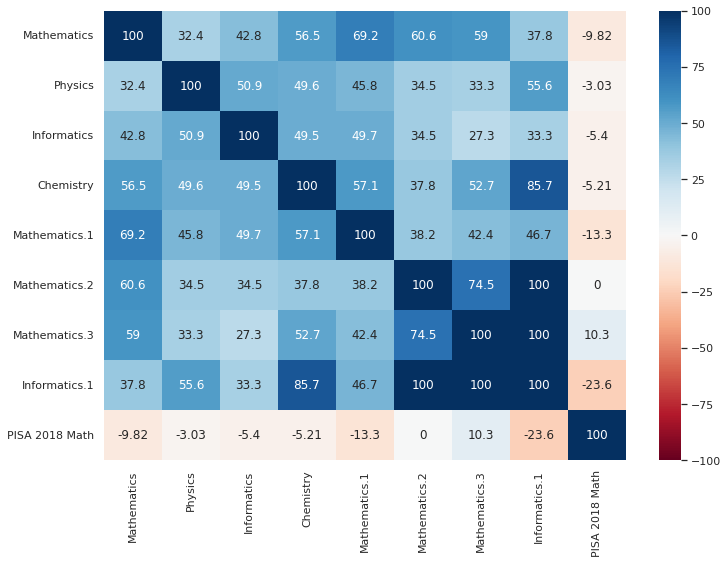

In [8]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.heatmap(heatmap, xticklabels=competitions, yticklabels=competitions, annot=True, cmap='RdBu', vmin=-100, vmax=100, fmt='.3g')